In [2]:
import pandas as pd

#Reading the data:
crop_data_path = 'cpdata.csv'
fertilizer_data_path = 'Fertilizer.csv'

crop_df = pd.read_csv(crop_data_path)
fert_df = pd.read_csv(fertilizer_data_path)

In [3]:
crop_df.head()

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
fert_df.head()

,Unnamed: 0,Crop,N,P,K,pH
0,0,Rice,80,40,40,5.5
1,1,Jowar(Sorghum),80,40,40,5.5
2,2,Barley(JAV),70,40,45,5.5
3,3,Maize,80,40,20,5.5
4,4,Ragi( naachnnii),50,40,20,5.5


In [9]:
#Lowering all the cases for uniformity:
def change_case(i):
    i = i.replace(" ", "")
    i = i.lower()
    return i
fert_df['Crop'] = fert_df['Crop'].apply(change_case)
crop_df['label'] = crop_df['label'].apply(change_case)

In [11]:
#Making changes in the ferttilizer dataset, for maintaing uniformity with the crop dataset:
fert_df['Crop'] = fert_df['Crop'].replace('mungbeans','mungbean')
fert_df['Crop'] = fert_df['Crop'].replace('lentils(masoordal)','lentil')
fert_df['Crop'] = fert_df['Crop'].replace('pigeonpeas(toordal)','pigeonpeas')
fert_df['Crop'] = fert_df['Crop'].replace('mothbean(matki)','mothbeans')
fert_df['Crop'] = fert_df['Crop'].replace('chickpeas(channa)','chickpea')

In [12]:
crop_df

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...
3095,25.287846,89.636679,6.765095,58.286977,watermelon
3096,26.638386,84.695469,6.189214,48.324286,watermelon
3097,25.331045,84.305338,6.904242,41.532187,watermelon
3098,26.897502,83.892415,6.463271,43.971937,watermelon


In [17]:
#Finding the unique crops from the crop dataset:
crop_names = crop_df['label'].unique()
crop_names

array(['rice', 'wheat', 'mungbean', 'tea', 'millet', 'maize', 'lentil',
       'jute', 'coffee', 'cotton', 'groundnut', 'peas', 'rubber',
       'sugarcane', 'tobacco', 'kidneybeans', 'mothbeans', 'coconut',
       'blackgram', 'adzukibeans', 'pigeonpeas', 'chickpea', 'banana',
       'grapes', 'apple', 'mango', 'muskmelon', 'orange', 'papaya',
       'pomegranate', 'watermelon'], dtype=object)

In [15]:
fert_df

,Unnamed: 0,Crop,N,P,K,pH
0,0,rice,80,40,40,5.50
1,1,jowar(sorghum),80,40,40,5.50
2,2,barley(jav),70,40,45,5.50
3,3,maize,80,40,20,5.50
4,4,ragi(naachnnii),50,40,20,5.50
...,...,...,...,...,...,...
1838,1838,lemongrass,25,40,40,5.32
1839,1839,cotton,120,40,20,5.32
1840,1840,jute,80,40,40,5.32
1841,1841,coffee,100,20,30,5.32


In [18]:
#Deleting the extra unwanted column:
del fert_df['Unnamed: 0']

In [20]:
#Finding the unique crops from the fertilizer dataset:
crop_names_from_fert = fert_df['Crop'].unique()
crop_names_from_fert

array(['rice', 'jowar(sorghum)', 'barley(jav)', 'maize',
       'ragi(naachnnii)', 'chickpea', 'frenchbeans(farasbi)',
       'favabeans(papdi-val)', 'limabeans(pavta)', 'clusterbeans(gavar)',
       'soyabean', 'blackeyedbeans(chawli)', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'greenpeas', 'horsegram(kulthi)',
       'blackgram', 'rapeseed(mohri)', 'corianderseeds', 'mustardseeds',
       'sesameseed', 'cuminseeds', 'lentil', 'brinjal', 'beetroot',
       'bittergourd', 'bottlegourd', 'capsicum', 'cabbage', 'carrot',
       'cauliflower', 'cucumber', 'corianderleaves', 'curryleaves',
       'drumstick–moringa', 'chili', 'ladyfinger', 'mushroom', 'onion',
       'potato', 'pumpkin', 'radish', 'olive', 'sweetpotato',
       'fenugreekleaf(methi)', 'spinach', 'ridgegourd',
       'gooseberry(amla)', 'jambun(syzygiumcumini)',
       'ziziphusmauritiana(bor)', 'garciniaindica(kokam)', 'tamarind',
       'tapioca(suran)', 'garlic', 'lemon', 'tomato', 'ashgourd',
       '

In [21]:
#Now extracting the labels:
extract_labels = []
for i in crop_names_from_fert:
    if i in crop_names:
        extract_labels.append(i)

In [22]:
#Using extract labesl on crop to get all the data related to those labels
new_crop = pd.DataFrame(columns = crop_df.columns)
new_fert = pd.DataFrame(columns = fert_df.columns)

In [24]:
for label in extract_labels:
    new_crop = new_crop.append(crop_df[crop_df['label'] == label])
for label in extract_labels:
    new_fert = new_fert.append(fert_df[fert_df['Crop'] == label].iloc[0])

In [25]:
new_crop.head()

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


In [26]:
new_fert.head()

,Crop,N,P,K,pH
0,rice,80,40,40,5.5
3,maize,80,40,20,5.5
5,chickpea,40,60,80,5.5
12,kidneybeans,20,60,20,5.5
13,pigeonpeas,20,60,20,5.5


# Merging the processed columns to form the new dataset:

In [38]:
new_fert['Crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

Visualizing the N, P, K values:

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

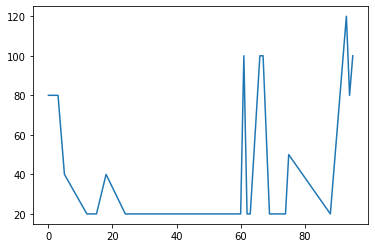

In [31]:
plt.plot(new_fert["N"])

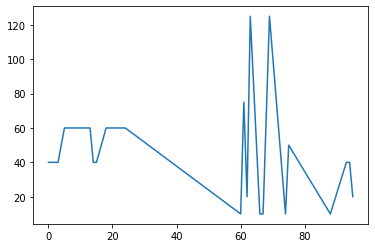

In [33]:
plt.plot(new_fert["P"])

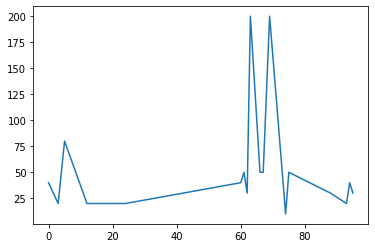

In [34]:
plt.plot(new_fert["K"])

Checking for Correlation:

In [42]:
#Add +/-3 for every NPK value
import random
temp = pd.DataFrame(columns = ['N','P','K'])
for i in range(0,new_crop.shape[0]):
    crop = new_crop.label.iloc[i]
    #print(crop)
    N = new_fert[new_fert['Crop'] == crop]["N"].iloc[0] + random.randint(-20,20)
    P = new_fert[new_fert['Crop'] == crop]["P"].iloc[0] + random.randint(-5,20)
    K = new_fert[new_fert['Crop'] == crop]["K"].iloc[0] + random.randint(-5,5)
    d = {"N":N,"P":P,"K":K}
    #print(d)
    temp = temp.append(d,ignore_index = True)

In [43]:
new_crop['N'] = temp['N']
new_crop['P'] = temp['P']
new_crop['K'] = temp['K']

In [44]:
new_crop

,temperature,humidity,ph,rainfall,label,N,P,K
0,20.879744,82.002744,6.502985,202.935536,rice,76,54,44
1,21.770462,80.319644,7.038096,226.655537,rice,89,39,42
2,23.004459,82.320763,7.840207,263.964248,rice,81,55,43
3,26.491096,80.158363,6.980401,242.864034,rice,77,43,45
4,20.130175,81.604873,7.628473,262.717340,rice,64,51,36
...,...,...,...,...,...,...,...,...
895,26.774637,66.413269,6.780064,177.774507,coffee,30,59,15
896,27.417112,56.636362,6.086922,127.924610,coffee,9,72,24
897,24.131797,67.225123,6.362608,173.322839,coffee,19,67,15
898,26.272418,52.127394,6.758793,127.175293,coffee,7,68,21


In [45]:
new_crop = new_crop[[ 'N', 'P', 'K','temperature', 'humidity', 'ph', 'rainfall', 'label']]

Thus the final dataset to be used is:

In [46]:
new_crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,76,54,44,20.879744,82.002744,6.502985,202.935536,rice
1,89,39,42,21.770462,80.319644,7.038096,226.655537,rice
2,81,55,43,23.004459,82.320763,7.840207,263.964248,rice
3,77,43,45,26.491096,80.158363,6.980401,242.864034,rice
4,64,51,36,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
895,30,59,15,26.774637,66.413269,6.780064,177.774507,coffee
896,9,72,24,27.417112,56.636362,6.086922,127.924610,coffee
897,19,67,15,24.131797,67.225123,6.362608,173.322839,coffee
898,7,68,21,26.272418,52.127394,6.758793,127.175293,coffee
